In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from datetime import date, timedelta
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import jax.numpy as jnp

import mechafil.data as mecha_data
import mechafil.sim as np_sim

import mechafil_jax.data as data
import mechafil_jax.sim as sim
import mechafil_jax.constants as C
import mechafil_jax.minting as minting

import scenario_generator.utils as u
import scenario_generator.curated as curated

In [3]:
save_dir = '/Users/kiran/Documents/baseline_project'
os.makedirs(save_dir, exist_ok=True)

In [4]:
token = '/Users/kiran/code/filecoin-mecha-twin/kiran_spacescope_auth.json'

start_date = date(2021, 3, 15)
current_date = date.today() - timedelta(days=3)
forecast_length = 10
end_date = current_date + timedelta(days=forecast_length)

offline_data = data.get_simulation_data(token, start_date, current_date, end_date)

print(start_date, current_date, end_date)

2021-03-15 2023-07-06 2023-07-16


In [5]:
baseline = minting.compute_baseline_power_array(
    np.datetime64(start_date), np.datetime64(end_date), offline_data['init_baseline_eib'],
)

In [6]:
lock_target = 0.3
sector_duration=360

In [7]:
offline_data.keys()

dict_keys(['rb_power_zero', 'qa_power_zero', 'historical_raw_power_eib', 'historical_qa_power_eib', 'historical_onboarded_qa_power_pib', 'historical_renewed_qa_power_pib', 'rb_known_scheduled_expire_vec', 'qa_known_scheduled_expire_vec', 'known_scheduled_pledge_release_full_vec', 'start_vested_amt', 'zero_cum_capped_power_eib', 'init_baseline_eib', 'circ_supply_zero', 'locked_fil_zero', 'daily_burnt_fil', 'burnt_fil_vec', 'historical_renewal_rate'])

In [8]:
# noops since we want to just look at current date
rbp = jnp.ones(forecast_length)*6
rr = jnp.ones(forecast_length)*0.8
fpr = jnp.ones(forecast_length)*0.8

simulation_results = sim.run_sim(
    rbp,
    rr,
    fpr,
    lock_target,

    start_date,
    current_date,
    forecast_length,
    sector_duration,
    offline_data
)

In [9]:
total_sim_len = (end_date - start_date).days
t = [start_date + timedelta(days=i) for i in range(total_sim_len)]

<IPython.core.display.Javascript object>


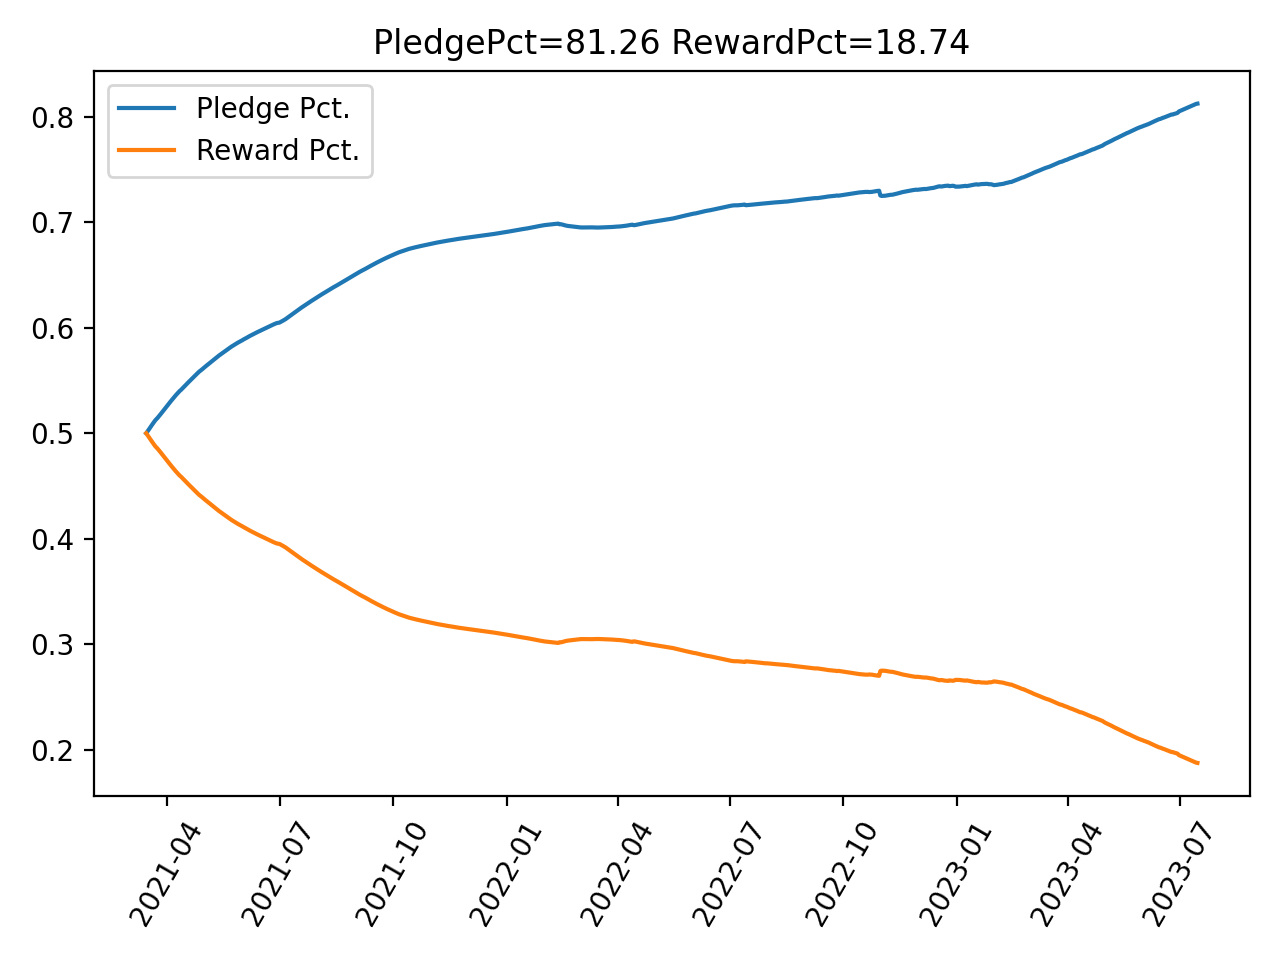

In [16]:
plt.figure()
pledge_pct = simulation_results['network_locked_pledge']/simulation_results['network_locked']
reward_pct = simulation_results['network_locked_reward']/simulation_results['network_locked']
plt.plot(t, pledge_pct, label='Pledge Pct.')
plt.plot(t, reward_pct, label='Reward Pct.')
plt.xticks(rotation=60)
plt.legend()
plt.title('PledgePct=%0.02f RewardPct=%0.02f' % (pledge_pct[-1]*100, reward_pct[-1]*100))
plt.tight_layout()
